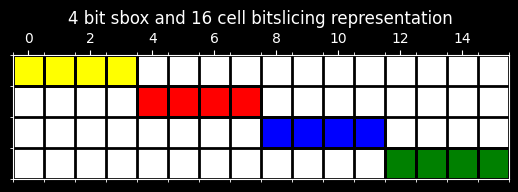

In [2]:
# i want to figure with 4*16 square grid, i can control which to highlight
# use the plotly library

import matplotlib.pyplot as plt
import numpy as np


def plot_highlighted_grid(rows, cols, highlighted_groups, title):
    # Create a grid of zeros
    grid = np.zeros((rows, cols))

    # Create a figure and axis
    fig, ax = plt.subplots()

    # Display the grid
    cax = ax.matshow(grid, cmap="gray_r")

    # Highlight the specified squares with different colors
    for group in highlighted_groups:
        squares, color = group
        for square in squares:
            rect = plt.Rectangle(
                (square[1] - 0.5, square[0] - 0.5),
                1,
                1,
                linewidth=2,
                edgecolor="black",
                facecolor=color,
            )
            ax.add_patch(rect)

    # Set the ticks
    ax.set_xticks(np.arange(-0.5, cols, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, rows, 1), minor=True)

    # Add gridlines based on minor ticks
    ax.grid(which="minor", color="black", linestyle="-", linewidth=2)

    # Remove major ticks
    ax.tick_params(
        which="major", bottom=False, left=False, labelbottom=False, labelleft=False
    )

    # Set the title of the plot
    ax.set_title(title)

    # Show the figure
    plt.show()


# Define the grid size
rows = 4
cols = 16

# Define the groups of squares to highlight with different colors
highlighted_groups = [
    (
        [(0, j) for j in range(4)],
        "yellow",
    ),  # Highlight the first 4 squares in the first row
    (
        [(1, j) for j in range(4, 8)],
        "red",
    ),  # Highlight the next 4 squares in the second row
    (
        [(2, j) for j in range(8, 12)],
        "blue",
    ),  # Highlight the next 4 squares in the third row
    (
        [(3, j) for j in range(12, 16)],
        "green",
    ),  # Highlight the last 4 squares in the fourth row
]


# Call the function with the highlighted squares
plot_highlighted_grid(
    rows, cols, highlighted_groups, "4 bit sbox and 16 cell bitslicing representation"
)

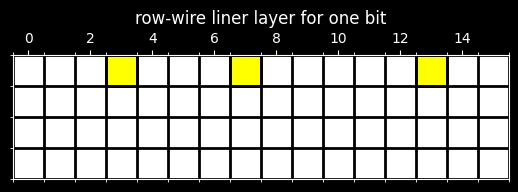

In [3]:
highlighted_squares = [([(0, 3), (0, 7), (0, 13)], "yellow")]
plot_highlighted_grid(
    rows, cols, highlighted_squares, "row-wire liner layer for one bit"
)

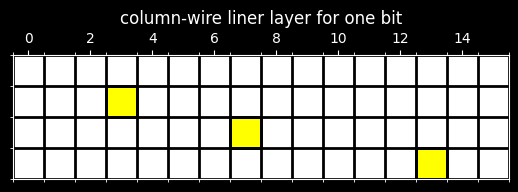

In [4]:
highlighted_squares = [([(1, 3), (2, 7), (3, 13)], "yellow")]
plot_highlighted_grid(
    rows, cols, highlighted_squares, "column-wire liner layer for one bit"
)

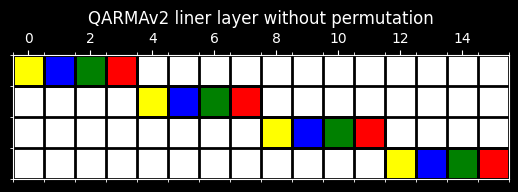

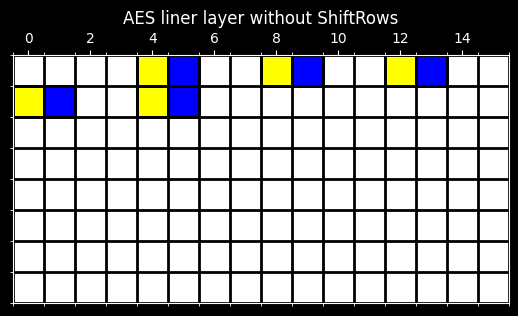

In [17]:
highlighted_squares = [
    ([(0, 0), (1, 4), (2, 8), (3, 12)], "yellow"),
    ([(0, 1), (1, 5), (2, 9), (3, 13)], "blue"),
    ([(0, 2), (1, 6), (2, 10), (3, 14)], "green"),
    ([(0, 3), (1, 7), (2, 11), (3, 15)], "red"),
]
plot_highlighted_grid(
    rows, cols, highlighted_squares, "QARMAv2 liner layer without permutation"
)
highlighted_squares = [
    ([(1, 0), (1, 4), (0, 4), (0, 8), (0, 12)], "yellow"),
    ([(1, 1), (1, 5), (0, 5), (0, 9), (0, 13)], "blue"),
]
plot_highlighted_grid(8, 16, highlighted_squares, "AES liner layer without ShiftRows")

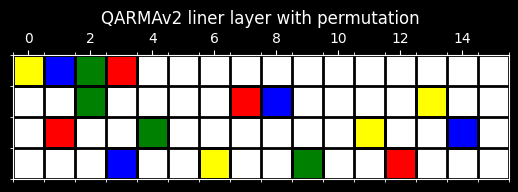

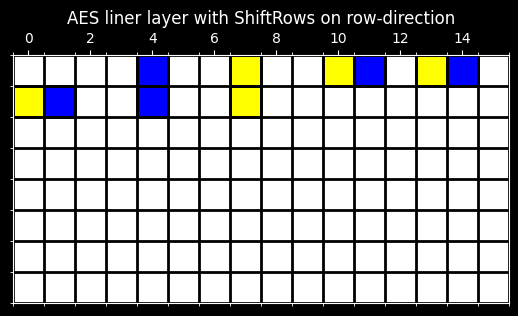

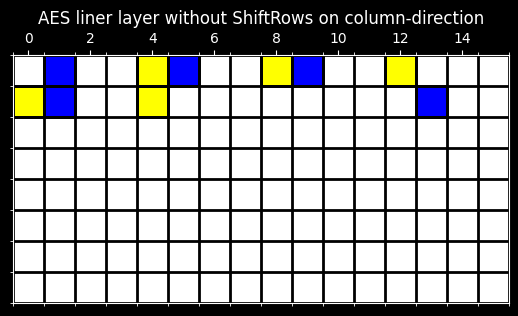

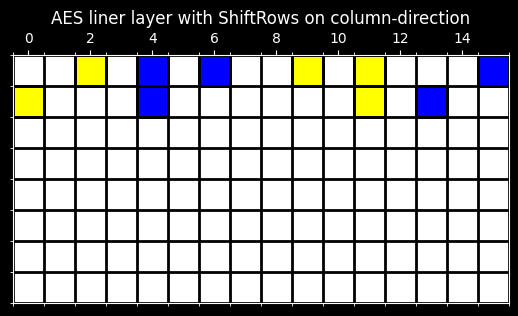

In [24]:
# Define the permutation
permutation = [0, 11, 6, 13, 10, 1, 12, 7, 5, 14, 3, 8, 15, 4, 9, 2]

# Define the original highlighted squares
highlighted_squares = [
    ([(0, 0), (1, 4), (2, 8), (3, 12)], "yellow"),
    ([(0, 1), (1, 5), (2, 9), (3, 13)], "blue"),
    ([(0, 2), (1, 6), (2, 10), (3, 14)], "green"),
    ([(0, 3), (1, 7), (2, 11), (3, 15)], "red"),
]

# Apply the permutation to the columns (except the first column)
permuted_highlighted_squares = []
for squares, color in highlighted_squares:
    permuted_squares = [
        (row, permutation.index(col)) if row != 0 else (row, col)
        for row, col in squares
    ]
    permuted_highlighted_squares.append((permuted_squares, color))
plot_highlighted_grid(
    rows, cols, permuted_highlighted_squares, "QARMAv2 liner layer with permutation"
)

aes_permutation = [0, 1, 2, 3, 5, 6, 7, 4, 10, 11, 8, 9, 15, 12, 13, 14]

highlighted_squares = [
    ([(1, 0), (1, 4), (0, 4), (0, 8), (0, 12)], "yellow"),
    ([(1, 1), (1, 5), (0, 5), (0, 9), (0, 13)], "blue"),
]

# Apply the permutation to the columns (except the first column)
permuted_highlighted_squares = []
for squares, color in highlighted_squares:
    permuted_squares = [(row, aes_permutation.index(col)) for row, col in squares]
    permuted_highlighted_squares.append((permuted_squares, color))
plot_highlighted_grid(
    8,
    16,
    permuted_highlighted_squares,
    "AES liner layer with ShiftRows on row-direction",
)

aes_permutation_column = [0, 5, 10, 15, 4, 9, 14, 3, 8, 13, 2, 7, 12, 1, 6, 11]

highlighted_squares = [
    ([(1, 0), (1, 4), (0, 4), (0, 8), (0, 12)], "yellow"),
    ([(1, 1), (1, 5), (0, 5), (0, 9), (0, 13)], "blue"),
]

# Apply the permutation to the columns (except the first column)
permuted_highlighted_squares = []
for squares, color in highlighted_squares:
    permuted_squares = [
        (row, aes_permutation_column.index(col)) for row, col in squares
    ]
    permuted_highlighted_squares.append((permuted_squares, color))
plot_highlighted_grid(
    8,
    16,
    permuted_highlighted_squares,
    "AES liner layer without ShiftRows on column-direction",
)

# Apply the permutation to the columns (except the first column)
permuted_highlighted_squares = []
for squares, color in highlighted_squares:
    permuted_squares = [
        (row, aes_permutation_column.index(aes_permutation.index(col)))
        for row, col in squares
    ]
    permuted_highlighted_squares.append((permuted_squares, color))
plot_highlighted_grid(
    8,
    16,
    permuted_highlighted_squares,
    "AES liner layer with ShiftRows on column-direction",
)